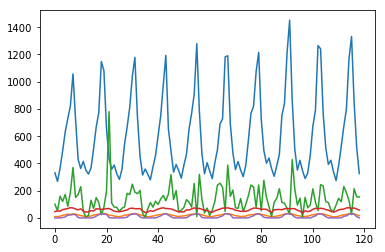

   ice_sales  avg_temp  total_rain  humidity  num_day_over25deg
0        331       9.3       101.0        46                  0
1        268       9.9        53.5        52                  0
2        365      12.7       159.5        49                  0
3        492      19.2       121.0        61                  3
4        632      22.4       172.5        65                  7


In [265]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#データ読み込み　Yは最初の列に配置する
dataframe = pandas.read_csv('c:/dev/dl/tokyo-weather-2003-2012.csv', usecols=[0,3,4,5,6], engine='python', skipfooter=1)
plt.plot(dataframe)
plt.show()
print(dataframe.head())

In [266]:
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

79 40


In [267]:
# convert an array of values into a dataset matrix
# if you give look_back 3, a part of the array will be like this: Jan, Feb, Mar
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i:(i+look_back), j]
            xset.append(a)
        dataY.append(dataset[i + look_back, 0])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(testX.shape)
print(testX[0])
print(testY)

# reshape input to be [samples, time steps(number of variables), features] *convert time series into column
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


(27, 5, 12)
[[ 0.80050719  0.38461539  0.19188505  0.11327136  0.14539307  0.07945901
   0.03127643  0.0972105   0.16568047  0.40912935  0.4843618   0.79712594]
 [ 0.86507934  0.72222215  0.55555546  0.34523803  0.16269836  0.10714284
   0.06349203  0.19444442  0.32936507  0.58333331  0.76190466  0.92460316]
 [ 0.30714747  0.06374758  0.35157761  0.19059885  0.10173857  0.00708307
   0.14359304  0.18029621  0.27108824  0.14230523  0.13457824  0.0856407 ]
 [ 0.84615391  0.71794873  0.71794873  0.69230765  0.38461536  0.12820512
   0.61538464  0.6410256   0.66666669  0.61538464  0.79487187  0.87179488]
 [ 0.96774191  0.6774193   0.16129032  0.03225806  0.          0.          0.
   0.          0.03225806  0.25806451  0.77419353  1.        ]]
[ 1.          0.50380385  0.19949281  0.07016063  0.13102284  0.06593406
  0.01775149  0.05156383  0.16398987  0.34150466  0.44209638  0.8427726
  0.82248521  0.42180899  0.20963651  0.10566357  0.13102284  0.0600169
  0.00507186  0.09890109  0.21639

In [268]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(testX.shape[1], look_back)))	#shape：変数数、遡る時間数
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
1s - loss: 0.1030
Epoch 2/1000
0s - loss: 0.0602
Epoch 3/1000
0s - loss: 0.0411
Epoch 4/1000
0s - loss: 0.0287
Epoch 5/1000
0s - loss: 0.0218
Epoch 6/1000
0s - loss: 0.0175
Epoch 7/1000
0s - loss: 0.0147
Epoch 8/1000
0s - loss: 0.0127
Epoch 9/1000
0s - loss: 0.0115
Epoch 10/1000
0s - loss: 0.0099
Epoch 11/1000
0s - loss: 0.0088
Epoch 12/1000
0s - loss: 0.0079
Epoch 13/1000
0s - loss: 0.0071
Epoch 14/1000
0s - loss: 0.0063
Epoch 15/1000
0s - loss: 0.0056
Epoch 16/1000
0s - loss: 0.0053
Epoch 17/1000
0s - loss: 0.0050
Epoch 18/1000
0s - loss: 0.0047
Epoch 19/1000
0s - loss: 0.0044
Epoch 20/1000
0s - loss: 0.0043
Epoch 21/1000
0s - loss: 0.0040
Epoch 22/1000
0s - loss: 0.0040
Epoch 23/1000
0s - loss: 0.0039
Epoch 24/1000
0s - loss: 0.0037
Epoch 25/1000
0s - loss: 0.0037
Epoch 26/1000
0s - loss: 0.0038
Epoch 27/1000
0s - loss: 0.0037
Epoch 28/1000
0s - loss: 0.0037
Epoch 29/1000
0s - loss: 0.0036
Epoch 30/1000
0s - loss: 0.0033
Epoch 31/1000
0s - loss: 0.0035
Epoch 32/1000
0s 

0s - loss: 7.3370e-04
Epoch 248/1000
0s - loss: 8.2606e-04
Epoch 249/1000
0s - loss: 7.2659e-04
Epoch 250/1000
0s - loss: 8.2795e-04
Epoch 251/1000
0s - loss: 7.1806e-04
Epoch 252/1000
0s - loss: 8.3639e-04
Epoch 253/1000
0s - loss: 7.8744e-04
Epoch 254/1000
0s - loss: 7.0486e-04
Epoch 255/1000
0s - loss: 6.7023e-04
Epoch 256/1000
0s - loss: 6.9119e-04
Epoch 257/1000
0s - loss: 7.4455e-04
Epoch 258/1000
0s - loss: 5.5707e-04
Epoch 259/1000
0s - loss: 8.1531e-04
Epoch 260/1000
0s - loss: 6.3985e-04
Epoch 261/1000
0s - loss: 6.9077e-04
Epoch 262/1000
0s - loss: 7.2632e-04
Epoch 263/1000
0s - loss: 6.8306e-04
Epoch 264/1000
0s - loss: 6.5214e-04
Epoch 265/1000
0s - loss: 6.6835e-04
Epoch 266/1000
0s - loss: 7.5036e-04
Epoch 267/1000
0s - loss: 6.2332e-04
Epoch 268/1000
0s - loss: 6.6652e-04
Epoch 269/1000
0s - loss: 6.4486e-04
Epoch 270/1000
0s - loss: 6.7380e-04
Epoch 271/1000
0s - loss: 6.2057e-04
Epoch 272/1000
0s - loss: 5.9350e-04
Epoch 273/1000
0s - loss: 7.1243e-04
Epoch 274/1000
0

0s - loss: 2.7857e-04
Epoch 470/1000
0s - loss: 3.1350e-04
Epoch 471/1000
0s - loss: 2.4770e-04
Epoch 472/1000
0s - loss: 2.4155e-04
Epoch 473/1000
0s - loss: 2.7229e-04
Epoch 474/1000
0s - loss: 2.7301e-04
Epoch 475/1000
0s - loss: 2.4663e-04
Epoch 476/1000
0s - loss: 3.0651e-04
Epoch 477/1000
0s - loss: 2.6969e-04
Epoch 478/1000
0s - loss: 2.5860e-04
Epoch 479/1000
0s - loss: 3.0325e-04
Epoch 480/1000
0s - loss: 3.3364e-04
Epoch 481/1000
0s - loss: 2.7029e-04
Epoch 482/1000
0s - loss: 3.1596e-04
Epoch 483/1000
0s - loss: 2.5255e-04
Epoch 484/1000
0s - loss: 2.3795e-04
Epoch 485/1000
0s - loss: 3.0198e-04
Epoch 486/1000
0s - loss: 2.4664e-04
Epoch 487/1000
0s - loss: 2.4163e-04
Epoch 488/1000
0s - loss: 2.3277e-04
Epoch 489/1000
0s - loss: 2.4176e-04
Epoch 490/1000
0s - loss: 2.5251e-04
Epoch 491/1000
0s - loss: 3.1842e-04
Epoch 492/1000
0s - loss: 2.8485e-04
Epoch 493/1000
0s - loss: 3.5387e-04
Epoch 494/1000
0s - loss: 2.6462e-04
Epoch 495/1000
0s - loss: 2.5002e-04
Epoch 496/1000
0

Epoch 692/1000
0s - loss: 1.0890e-04
Epoch 693/1000
0s - loss: 1.4071e-04
Epoch 694/1000
0s - loss: 1.0446e-04
Epoch 695/1000
0s - loss: 1.3534e-04
Epoch 696/1000
0s - loss: 1.7784e-04
Epoch 697/1000
0s - loss: 1.1332e-04
Epoch 698/1000
0s - loss: 1.5134e-04
Epoch 699/1000
0s - loss: 1.4941e-04
Epoch 700/1000
0s - loss: 1.9332e-04
Epoch 701/1000
0s - loss: 1.4112e-04
Epoch 702/1000
0s - loss: 1.1374e-04
Epoch 703/1000
0s - loss: 1.1314e-04
Epoch 704/1000
0s - loss: 9.5926e-05
Epoch 705/1000
0s - loss: 9.5742e-05
Epoch 706/1000
0s - loss: 1.2002e-04
Epoch 707/1000
0s - loss: 1.5621e-04
Epoch 708/1000
0s - loss: 1.9591e-04
Epoch 709/1000
0s - loss: 1.0925e-04
Epoch 710/1000
0s - loss: 1.3639e-04
Epoch 711/1000
0s - loss: 1.4747e-04
Epoch 712/1000
0s - loss: 1.1951e-04
Epoch 713/1000
0s - loss: 1.3288e-04
Epoch 714/1000
0s - loss: 1.7270e-04
Epoch 715/1000
0s - loss: 8.4736e-05
Epoch 716/1000
0s - loss: 1.0413e-04
Epoch 717/1000
0s - loss: 1.2504e-04
Epoch 718/1000
0s - loss: 1.5847e-04
E

Epoch 914/1000
0s - loss: 6.3809e-05
Epoch 915/1000
0s - loss: 7.9984e-05
Epoch 916/1000
0s - loss: 4.8966e-05
Epoch 917/1000
0s - loss: 5.2750e-05
Epoch 918/1000
0s - loss: 5.9976e-05
Epoch 919/1000
0s - loss: 6.9331e-05
Epoch 920/1000
0s - loss: 4.0361e-05
Epoch 921/1000
0s - loss: 8.9457e-05
Epoch 922/1000
0s - loss: 4.5781e-05
Epoch 923/1000
0s - loss: 4.8792e-05
Epoch 924/1000
0s - loss: 3.2612e-05
Epoch 925/1000
0s - loss: 4.2114e-05
Epoch 926/1000
0s - loss: 6.9694e-05
Epoch 927/1000
0s - loss: 4.7586e-05
Epoch 928/1000
0s - loss: 4.2249e-05
Epoch 929/1000
0s - loss: 4.8012e-05
Epoch 930/1000
0s - loss: 9.1013e-05
Epoch 931/1000
0s - loss: 8.1776e-05
Epoch 932/1000
0s - loss: 5.3637e-05
Epoch 933/1000
0s - loss: 7.5029e-05
Epoch 934/1000
0s - loss: 3.3889e-05
Epoch 935/1000
0s - loss: 3.9164e-05
Epoch 936/1000
0s - loss: 1.7350e-04
Epoch 937/1000
0s - loss: 1.4731e-04
Epoch 938/1000
0s - loss: 5.2606e-05
Epoch 939/1000
0s - loss: 5.6963e-05
Epoch 940/1000
0s - loss: 5.9239e-05
E

In [264]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
pad_col = numpy.zeros(dataset.shape[1]-1)

# invert predictions
def pad_array(val):
    return numpy.array([numpy.insert(pad_col, 0, x) for x in val])
    
trainPredict = scaler.inverse_transform(pad_array(trainPredict))
trainY = scaler.inverse_transform(pad_array(trainY))
testPredict = scaler.inverse_transform(pad_array(testPredict))
testY = scaler.inverse_transform(pad_array(testY))

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 30.20 RMSE
Test Score: 111.97 RMSE


[ 1451.00000179   863.99995152   503.99999229   351.00001666   423.00001556
   345.99998981   289.00000096   329.00000427   462.0000135    672.00001322
   791.00001777  1264.99998995  1241.00000207   767.00002989   515.99998623
   392.99999546   423.00001556   338.99998747   274.00000854   384.99998774
   523.99999394   671.00000785   797.99998485  1165.00001694  1331.99992673
   848.99997673   515.00001611]
[ 1059.85835788   793.28683727   522.24769289   342.00613815   416.33646264
   340.4159625    291.66957883   385.71532616   516.43599901   657.70160051
   732.47766847   984.90223677  1179.21903281   696.6758262    522.03947008
   376.28810553   401.53958088   330.33752556   282.08873835   363.97376777
   487.15337099   628.04462271   750.29034347   964.59638804  1300.55532123
   740.47771144   528.47565611]


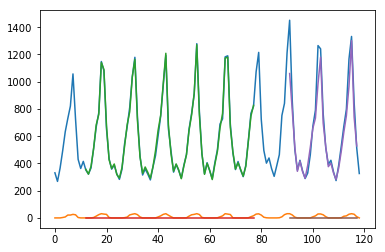

In [258]:
print(testY[:,0])
print(testPredict[:,0])
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()